# Citi bikes project

In [10]:
#Lets import the libraries we are going to use for out analisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
#get data file names
path =r'C:\Users\Aleksandr\Desktop\python\Python_final_project'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

In [3]:
# Checking on out data before saving it as one file
big_frame.head(2)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,61,2015-09-21 14:53:16,2015-09-21 14:54:17,3185,City Hall,40.717732,-74.043845,3185,City Hall,40.717732,-74.043845,24722,Subscriber,1975.0,1
1,290,2015-09-21 14:55:59,2015-09-21 15:00:50,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,-74.038051,24388,Customer,NaN,0


In [4]:
# Saving all the uploaded files as one file
big_frame.to_csv(r'C:\Users\Aleksandr\Desktop\python\Python_final_project\final_bike.csv', index=False)

In [11]:
# Reading the file we've just created
bike = pd.read_csv(r'C:\Users\Aleksandr\Desktop\python\Python_final_project\final_bike.csv', encoding = 'utf-8')

In [12]:
# Lets take a general look at the data, taking in account that Gender: Zero=unknown; 1=male; 2=female mil 7 hundr, 15 col
bike.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,61,2015-09-21 14:53:16,2015-09-21 14:54:17,3185,City Hall,40.717732,-74.043845,3185,City Hall,40.717732,-74.043845,24722,Subscriber,1975.0,1
1,290,2015-09-21 14:55:59,2015-09-21 15:00:50,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,-74.038051,24388,Customer,NaN,0
2,786,2015-09-21 14:56:14,2015-09-21 15:09:21,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,-74.033459,24442,Subscriber,1962.0,1
3,477,2015-09-21 14:58:35,2015-09-21 15:06:32,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,24678,Subscriber,1977.0,2
4,451,2015-09-21 14:59:55,2015-09-21 15:07:27,3203,Hamilton Park,40.727596,-74.044247,3186,Grove St PATH,40.719586,-74.043117,24574,Subscriber,1977.0,2


In [13]:
# Lets learn the data, so it has 15 columns with different types of data and 1702660 records 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702660 entries, 0 to 1702659
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Trip Duration            int64  
 1   Start Time               object 
 2   Stop Time                object 
 3   Start Station ID         int64  
 4   Start Station Name       object 
 5   Start Station Latitude   float64
 6   Start Station Longitude  float64
 7   End Station ID           int64  
 8   End Station Name         object 
 9   End Station Latitude     float64
 10  End Station Longitude    float64
 11  Bike ID                  int64  
 12  User Type                object 
 13  Birth Year               float64
 14  Gender                   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 194.9+ MB


In [14]:
#Lets find out how many unique start station we've got
print(bike['Start Station Name'].unique())
print(bike['Start Station Name'].nunique())

['City Hall' 'Exchange Place' 'Hamilton Park' 'Sip Ave' 'Christ Hospital'
 'Baldwin at Montgomery' 'Warren St' 'Newport PATH' 'Newark Ave'
 'Brunswick St' 'Newport Pkwy' 'Bayside Park' 'Grove St PATH'
 'Riverview Park' 'Essex Light Rail' 'Paulus Hook' 'Columbia Park'
 'Heights Elevator' 'NJCU' 'MLK Light Rail' '5 Corners Library' 'Dey St'
 'Oakland Ave' 'Hilltop' 'Van Vorst Park' 'McGinley Square' 'Central Ave'
 'JC Medical Center' 'North St' 'Lincoln Park' 'Liberty Light Rail'
 'West Side Light Rail' 'Pershing Field' 'Garfield Ave Station' 'Union St'
 'Jersey & 6th St' 'Morris Canal' 'Jersey & 3rd' 'Lafayette Park'
 'Monmouth and 6th' 'Dixon Mills' 'Marin Light Rail' 'Manila & 1st'
 'Columbus Drive' 'Bethune Center' 'Leonard Gordon Park'
 'Danforth Light Rail' 'Brunswick & 6th' 'Astor Place' 'JCBS Depot'
 'Communipaw & Berry Lane' 'York St' 'Harborside' 'Washington St'
 'Journal Square' 'Montgomery St' 'Glenwood Ave' 'Fairmount Ave'
 'Bergen Ave' 'Grand St' 'Jackson Square' 'Hoboken A

In [15]:
# Lets find out how many unique end station we've got. Looks like there are some additional gathering points for handing in bikes.
print(len(bike['End Station Name'].unique()))

286


In [16]:
#Let's find top 10 start_stations
ss = bike.groupby('Start Station Name')
sss = ss.count().sort_values(by=['Start Station ID'], ascending = False).head(10).reset_index()
sss.head(2)

,Start Station Name,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,Grove St PATH,182022,182022,182022,182022,182022,182022,182022,182022,182022,182022,182022,181996,178937,182022
1,Hamilton Park,99444,99444,99444,99444,99444,99444,99444,99444,99444,99444,99444,99428,96966,99444


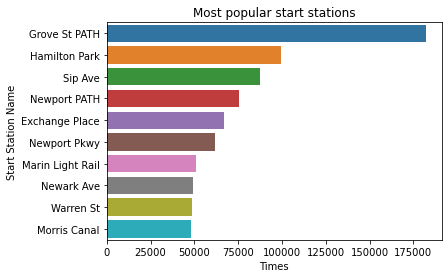

In [19]:
# As we can see bikes are taken almost twice as much from this station as they are taken from the second one
sns.barplot(x = 'Start Station ID', y = 'Start Station Name', data = sss).set_title("Most popular start stations")
plt.xlabel('Times')
plt.savefig('Top10Start.jpg', bbox_inches='tight')

In [21]:
#Let's find top 10 end_stations
ss1 = bike.groupby('End Station Name')
ss2 = ss1.count().sort_values(by=['Trip Duration'], ascending = False).head(10).reset_index()
ss2.head(2)

,End Station Name,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,Grove St PATH,227770,227770,227770,227770,227770,227770,227770,227770,227770,227770,227770,227746,224455,227770
1,Hamilton Park,94247,94247,94247,94247,94247,94247,94247,94247,94247,94247,94247,94236,91922,94247


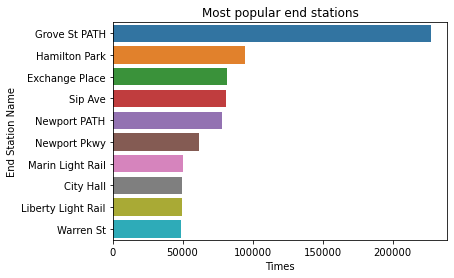

In [22]:
# As we can see from the plot there is the same top point (Grove St Path) that has more returned bikes that taken from it
sns.barplot(x = 'End Station ID', y = 'End Station Name', data = ss2).set_title("Most popular end stations")
plt.xlabel('Times')
plt.savefig('Top10End.jpg', bbox_inches='tight')
# As we can see 8 out of 10 Start Stations correspond to End Stations

In [16]:
ss2

,End Station Name,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,Grove St PATH,227770,227770,227770,227770,227770,227770,227770,227770,227770,227770,227770,227746,224455,227770
1,Hamilton Park,94247,94247,94247,94247,94247,94247,94247,94247,94247,94247,94247,94236,91922,94247
2,Exchange Place,81650,81650,81650,81650,81650,81650,81650,81650,81650,81650,81650,81569,77088,81650
3,Sip Ave,80964,80964,80964,80964,80964,80964,80964,80964,80964,80964,80964,80951,79748,80964
4,Newport PATH,77821,77821,77821,77821,77821,77821,77821,77821,77821,77821,77821,77789,74889,77821
5,Newport Pkwy,61677,61677,61677,61677,61677,61677,61677,61677,61677,61677,61677,61652,58528,61677
6,Marin Light Rail,50171,50171,50171,50171,50171,50171,50171,50171,50171,50171,50171,50162,49112,50171
7,City Hall,49463,49463,49463,49463,49463,49463,49463,49463,49463,49463,49463,49448,48105,49463
8,Liberty Light Rail,49280,49280,49280,49280,49280,49280,49280,49280,49280,49280,49280,49217,45675,49280
9,Warren St,48681,48681,48681,48681,48681,48681,48681,48681,48681,48681,48681,48654,47033,48681


In [23]:
# Lets find top 10 routs (Start Station - End Station)
# We'll create a new column named 'Route', that includes Start and End stations
bike['Route'] = bike['Start Station Name'] +'-'+ bike['End Station Name']

In [24]:
bike.head(2)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Route
0,61,2015-09-21 14:53:16,2015-09-21 14:54:17,3185,City Hall,40.717732,-74.043845,3185,City Hall,40.717732,-74.043845,24722,Subscriber,1975.0,1,City Hall-City Hall
1,290,2015-09-21 14:55:59,2015-09-21 15:00:50,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,-74.038051,24388,Customer,NaN,0,Exchange Place-Warren St


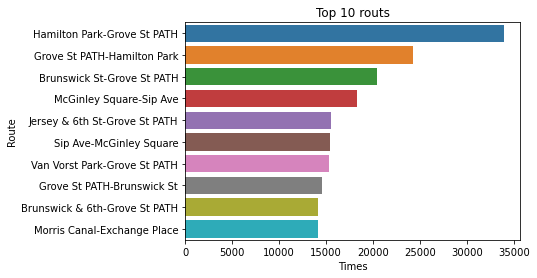

In [29]:
#Top 10 routs
ro = bike.groupby('Route')
rou = ro.count().sort_values(['Trip Duration'], ascending = False).head(10).reset_index()
sns.barplot(x = 'Trip Duration', y = 'Route', data = rou).set_title("Top 10 routs")
plt.xlabel('Times')
plt.savefig('Top10routs.jpg', bbox_inches='tight')


In [30]:
# Lets find out how different average trip time for men and women is
bike['Gender'] = bike['Gender'].apply(lambda x: 'Men' if x == 1 else 'Women' if x == 2 else 0)
bike_gender = bike.copy()

In [31]:
Gender_without_0 = bike_gender[bike_gender['Gender']!=0]
Gender_without_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554899 entries, 0 to 1702659
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Trip Duration            1554899 non-null  int64  
 1   Start Time               1554899 non-null  object 
 2   Stop Time                1554899 non-null  object 
 3   Start Station ID         1554899 non-null  int64  
 4   Start Station Name       1554899 non-null  object 
 5   Start Station Latitude   1554899 non-null  float64
 6   Start Station Longitude  1554899 non-null  float64
 7   End Station ID           1554899 non-null  int64  
 8   End Station Name         1554899 non-null  object 
 9   End Station Latitude     1554899 non-null  float64
 10  End Station Longitude    1554899 non-null  float64
 11  Bike ID                  1554899 non-null  int64  
 12  User Type                1554402 non-null  object 
 13  Birth Year               1554899 non-null 

In [32]:
bike['Start Station Name'].unique()

array(['City Hall', 'Exchange Place', 'Hamilton Park', 'Sip Ave',
       'Christ Hospital', 'Baldwin at Montgomery', 'Warren St',
       'Newport PATH', 'Newark Ave', 'Brunswick St', 'Newport Pkwy',
       'Bayside Park', 'Grove St PATH', 'Riverview Park',
       'Essex Light Rail', 'Paulus Hook', 'Columbia Park',
       'Heights Elevator', 'NJCU', 'MLK Light Rail', '5 Corners Library',
       'Dey St', 'Oakland Ave', 'Hilltop', 'Van Vorst Park',
       'McGinley Square', 'Central Ave', 'JC Medical Center', 'North St',
       'Lincoln Park', 'Liberty Light Rail', 'West Side Light Rail',
       'Pershing Field', 'Garfield Ave Station', 'Union St',
       'Jersey & 6th St', 'Morris Canal', 'Jersey & 3rd',
       'Lafayette Park', 'Monmouth and 6th', 'Dixon Mills',
       'Marin Light Rail', 'Manila & 1st', 'Columbus Drive',
       'Bethune Center', 'Leonard Gordon Park', 'Danforth Light Rail',
       'Brunswick & 6th', 'Astor Place', 'JCBS Depot',
       'Communipaw & Berry Lane', 'York 

In [33]:
bike.head(1)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Route
0,61,2015-09-21 14:53:16,2015-09-21 14:54:17,3185,City Hall,40.717732,-74.043845,3185,City Hall,40.717732,-74.043845,24722,Subscriber,1975.0,Men,City Hall-City Hall


In [34]:
# Lets convert the column 'Start Time' to a data object in order for that to be more convinient to work with
bike['Start Time']  = pd.to_datetime(bike['Start Time'])

In [35]:
# Lets create new columns with year, month and hour. We won't creat a column 'Day' because we don't have enough data for such a column
bike['Year'] = bike['Start Time'].apply(lambda x: x.year)
bike['Month'] = bike['Start Time'].apply(lambda x: x.month)
bike['Hour'] = bike['Start Time'].apply(lambda x: x.hour)

In [36]:
bike.head(1)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Route,Year,Month,Hour
0,61,2015-09-21 14:53:16,2015-09-21 14:54:17,3185,City Hall,40.717732,-74.043845,3185,City Hall,40.717732,-74.043845,24722,Subscriber,1975.0,Men,City Hall-City Hall,2015,9,14


In [37]:
# Lets build a pivot table with columns, representing months and rows representing years
MonthYear = bike.groupby(by=['Year', 'Month']).count()['Start Time'].unstack()
MonthYear

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6668.0,19264.0,15113.0,11838.0
2016,7479.0,8250.0,13511.0,16342.0,19488.0,23947.0,24436.0,34149.0,33425.0,29611.0,21832.0,15114.0
2017,12926.0,14026.0,12201.0,21186.0,25966.0,32060.0,33573.0,35472.0,33119.0,34919.0,23582.0,15898.0
2018,12677.0,15104.0,17109.0,23634.0,34456.0,40937.0,42268.0,44432.0,39022.0,39138.0,24910.0,20205.0
2019,19676.0,18565.0,23606.0,33056.0,36135.0,39430.0,43746.0,48711.0,49244.0,42253.0,30797.0,19728.0
2020,26020.0,22962.0,17719.0,9268.0,25077.0,36921.0,38680.0,43267.0,53833.0,30086.0,21275.0,11694.0
2021,11624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


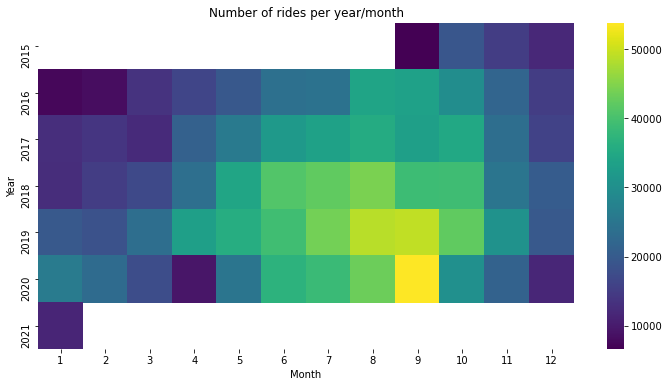

In [38]:
# Lets built a heat map representing number of rides in year/month time
plt.figure(figsize = (12,6))
sns.heatmap(MonthYear, cmap = 'viridis').set_title("Number of rides per year/month")
plt.savefig('heatyearmonth.jpg', bbox_inches='tight')

In [39]:
# Lets build a pivot table to see Month/hour count
bike1 = bike[bike['Year']<=2017]
bike2 = bike1.groupby(by=['Month', 'Hour']).count()['Start Time'].unstack()
bike2

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,182,93,59,37,72,215,631,1516,2738,1300,...,934,863,1022,1805,1977,1439,913,616,448,257
2,209,104,46,25,66,196,639,1582,2867,1369,...,940,1006,1237,2020,2146,1536,981,696,525,287
3,203,113,46,38,72,287,755,1718,3169,1570,...,1003,1164,1407,2479,2886,1909,1298,849,635,370
4,308,155,82,43,118,360,1057,2225,4128,2113,...,1800,1928,2294,3729,3815,2747,1722,1221,846,493
5,424,221,101,67,116,437,1306,2889,5317,2647,...,1935,2010,2462,4197,4578,3453,2336,1626,1147,649
6,496,304,163,105,137,496,1733,3631,6079,3449,...,2178,2327,2761,5162,5547,4388,3343,2150,1504,891
7,593,310,201,124,139,517,1591,3548,6112,3368,...,2427,2641,3231,5047,5535,4565,3482,2261,1572,934
8,598,309,208,122,198,623,2089,4646,8007,4446,...,2721,2791,3533,6175,7323,5594,3855,2754,1812,1032
9,638,341,217,124,187,693,2035,4782,8023,4519,...,3164,3219,4042,6592,7512,5514,3747,2617,1793,1067


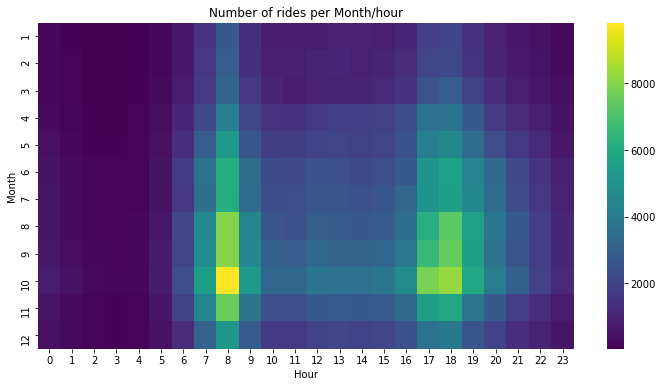

In [40]:
# Lets build a heat map to see number of rides per Month/hour
plt.figure(figsize=(12,6))
sns.heatmap(bike2, cmap = 'viridis').set_title("Number of rides per Month/hour")
plt.savefig('heatmonthhour.jpg', bbox_inches='tight')

In [41]:
# Lets find top 10 months over all year with highest number of rides per month
bikeMonth = bike.groupby(by=['Month', 'Year']).count()['Start Time']
bike3 = bikeMonth.to_frame().sort_values('Start Time', ascending = False).reset_index().head(10)
bike3

,Month,Year,Start Time
0,9,2020,53833
1,9,2019,49244
2,8,2019,48711
3,8,2018,44432
4,7,2019,43746
5,8,2020,43267
6,7,2018,42268
7,10,2019,42253
8,6,2018,40937
9,6,2019,39430


In [42]:
# Lets find the number of bikes per month and year
bikeMonthYear = bike.groupby(['Month','Year']).nunique()['Bike ID'].unstack().T
bikeMonthYear

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,326.0,321.0,281.0,260.0
2016,241.0,254.0,303.0,300.0,292.0,292.0,287.0,465.0,456.0,452.0,426.0,345.0
2017,311.0,398.0,455.0,458.0,477.0,499.0,503.0,517.0,689.0,431.0,310.0,258.0
2018,221.0,306.0,397.0,554.0,589.0,621.0,608.0,593.0,578.0,569.0,510.0,446.0
2019,434.0,469.0,462.0,493.0,494.0,499.0,499.0,483.0,494.0,494.0,477.0,432.0
2020,687.0,730.0,539.0,530.0,590.0,695.0,630.0,583.0,579.0,590.0,612.0,576.0
2021,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Top months/number of rides')

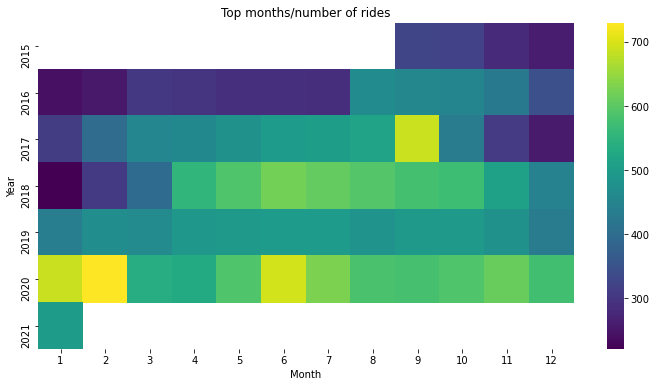

In [43]:
plt.figure(figsize = (12,6))
sns.heatmap(bikeMonthYear, cmap = 'viridis').set_title("Top months/number of rides")

In [44]:
# Lets find out the number of customers and subscribers per year
bike.head(5)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Route,Year,Month,Hour
0,61,2015-09-21 14:53:16,2015-09-21 14:54:17,3185,City Hall,40.717732,-74.043845,3185,City Hall,40.717732,-74.043845,24722,Subscriber,1975.0,Men,City Hall-City Hall,2015,9,14
1,290,2015-09-21 14:55:59,2015-09-21 15:00:50,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,-74.038051,24388,Customer,NaN,0,Exchange Place-Warren St,2015,9,14
2,786,2015-09-21 14:56:14,2015-09-21 15:09:21,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,-74.033459,24442,Subscriber,1962.0,Men,Exchange Place-Exchange Place,2015,9,14
3,477,2015-09-21 14:58:35,2015-09-21 15:06:32,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,24678,Subscriber,1977.0,Women,Hamilton Park-Hamilton Park,2015,9,14
4,451,2015-09-21 14:59:55,2015-09-21 15:07:27,3203,Hamilton Park,40.727596,-74.044247,3186,Grove St PATH,40.719586,-74.043117,24574,Subscriber,1977.0,Women,Hamilton Park-Grove St PATH,2015,9,14


In [45]:
#Lets create a new column with year/month value in order to find out how the number of rides has changed over all months
bike['mnth_yr'] = bike['Start Time'].apply(lambda x: x.strftime('%Y-%m'))

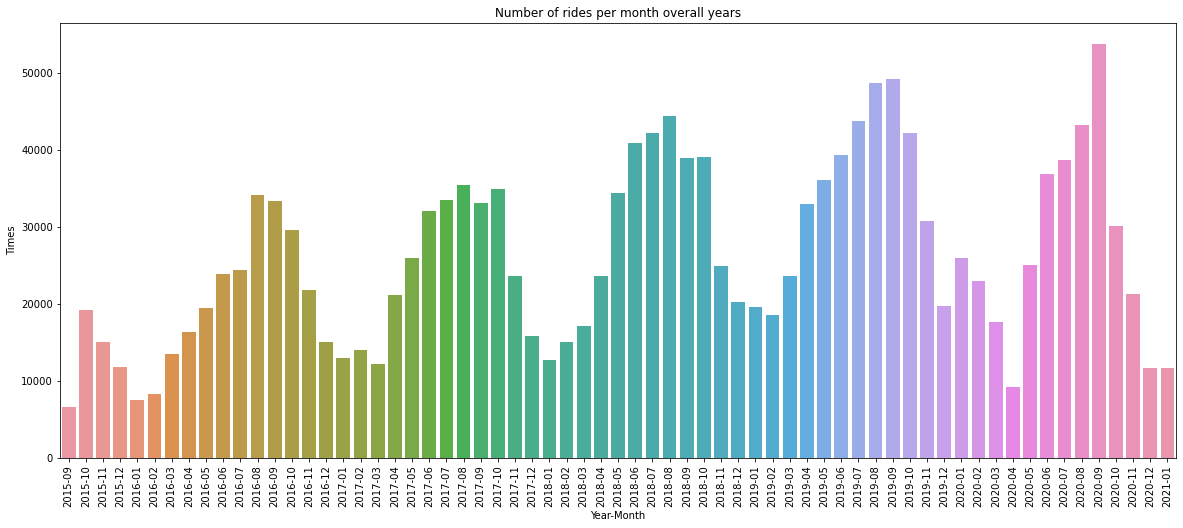

In [48]:
#Lets build a bar plot representing number of rides per month starting from the beginning (September 2015)
numrides = bike.groupby('mnth_yr').count()['Start Time'].to_frame().reset_index().sort_values('mnth_yr')
plt.figure(figsize = (20,8))
sns.barplot(x = 'mnth_yr', y = 'Start Time', data = numrides).set_title("Number of rides per month overall years")
plt.xticks(rotation='vertical')
plt.ylabel("Times")
plt.xlabel('Year-Month')
plt.savefig('overall.jpg')

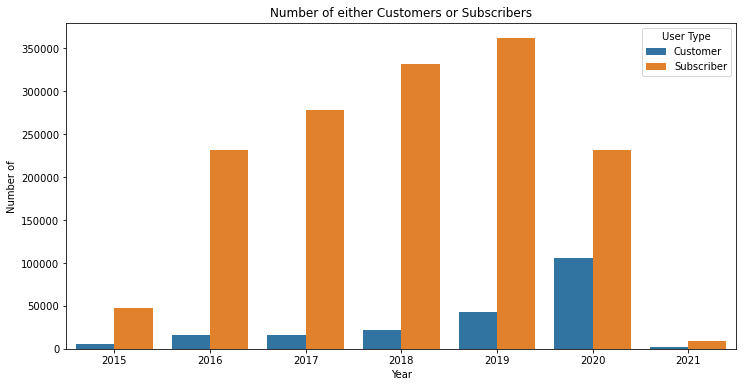

In [49]:
#lets find out the number of customers and subscribers per year
usersubs = bike.groupby(['Year', 'User Type']).count()['Start Time'].reset_index()
plt.figure(figsize = (12,6))
sns.barplot(x = 'Year', y = 'Start Time', data = usersubs, hue = 'User Type').set_title("Number of either Customers or Subscribers")
plt.ylabel("Number of")
plt.savefig('barchartusertype.jpg', bbox_inches='tight')

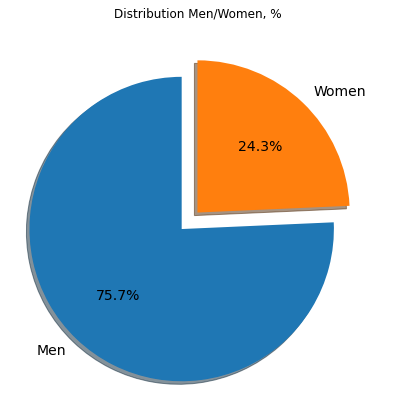

In [52]:
# lets find out the number of rides per men and women and build a pie chart representing the percentage
bike5 = bike[bike['Gender']!=0]
bike6 = bike5['Gender']
bike7 = bike6.value_counts().reset_index()
Gender = bike7['index']
NumGen = bike7['Gender']
fig = plt.figure(figsize = (10, 7))
explode = (0.15, 0.0)
plt.pie(NumGen, labels = Gender, explode = explode, shadow = True, startangle = 90, textprops={'fontsize': 14}, autopct='%.1f%%')
plt.title('Distribution Men/Women, %')
plt.savefig('numridesmenwomen.jpg', bbox_inches='tight')
plt.show()


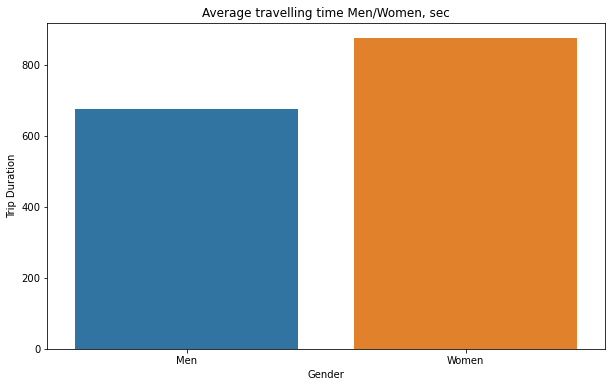

In [54]:
# Lets find out what the average travelling time for men and women is
menwomen = bike5.groupby('Gender').mean()['Trip Duration'].reset_index()
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'Gender', y = 'Trip Duration', data = menwomen).set_title("Average travelling time Men/Women, sec")
plt.savefig('avertimetrip.jpg', bbox_inches='tight')

In [55]:
# Lets now define age groups and try to show all of them over all the time
bikeage = bike[bike['Birth Year'].notnull()]
bikeage['Birth Year'] = bikeage['Birth Year'].apply(np.int64)

<ipython-input-55-902b34b01d7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeage['Birth Year'] = bikeage['Birth Year'].apply(np.int64)


In [56]:
bikeage['Age'] = bikeage['Birth Year'].apply(lambda x: 'Teenagers < 18' if (2021-x)<18 
                                             else 'Young 18-30' if 18 <= (2021-x) <30 
                                             else 'Adults 30-45' if 30 <= (2021-x) <=45
                                            else 'Old 45+' if (2021-x) >45 else '')

<ipython-input-56-fddc06c44a2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeage['Age'] = bikeage['Birth Year'].apply(lambda x: 'Teenagers < 18' if (2021-x)<18


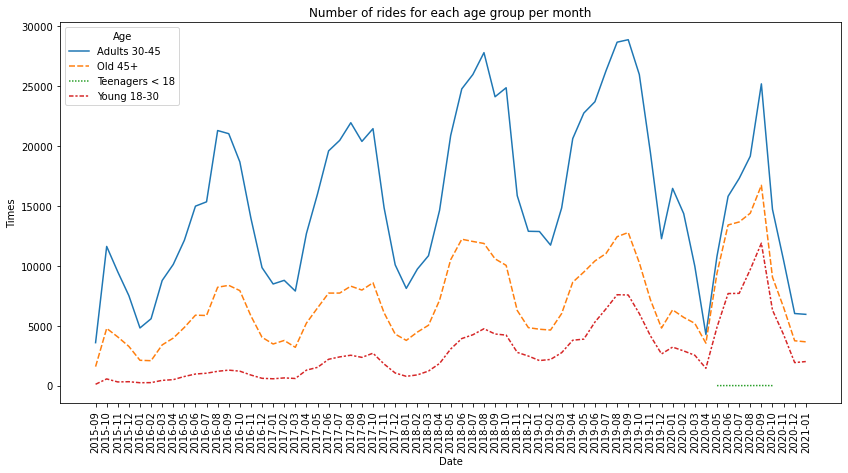

In [57]:
#Lets display the number of rides per month for every age group with a line chart
bikeage1 = bikeage.groupby(['mnth_yr', 'Age']).count()['Start Time'].to_frame().reset_index()
plt.rcParams["figure.figsize"] = (14,7)
bikeage2 = pd.pivot_table(bikeage1, values = 'Start Time', index = 'mnth_yr', columns = ['Age'])
sns.lineplot(data = bikeage2).set_title("Number of rides for each age group per month")
plt.xticks(rotation='vertical')
plt.ylabel("Times")
plt.xlabel('Date')
plt.savefig('agegroupsline.jpg', bbox_inches='tight')

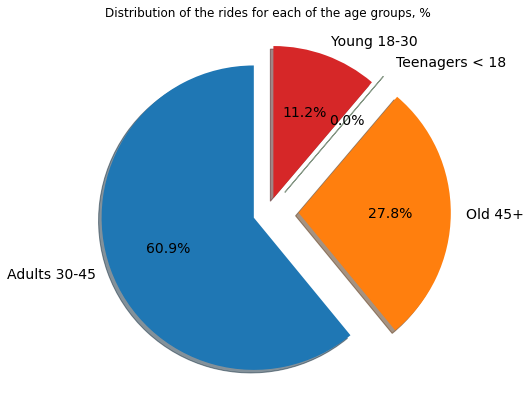

In [58]:
# lets find out the number of rides per different age groups overall
bikeage3 = bikeage1.groupby('Age').sum()['Start Time'].to_frame().reset_index()
Age = bikeage3['Age']
Times = bikeage3['Start Time']
fig = plt.figure(figsize = (10, 7))
explode = (0.1, 0.2, 0.2, 0.1)
plt.pie(Times, labels = Age, explode = explode, shadow = True, startangle = 90, textprops={'fontsize': 14}, autopct='%.1f%%')
plt.title('Distribution of the rides for each of the age groups, %')
plt.savefig('agegrouppie.jpg', bbox_inches='tight')
plt.show()

# *[Presentation](https://drive.google.com/file/d/1Ba7CPKbro5e_Vr2hWjVKlzR-0twISI2X/view?usp=sharing "Please click me")*